# Linear Regression
Regression is a method to predict a continuous value. i.e: 

- Predicting housing prices (y) giving the size of the house (x)
- Predicting stock (y) prices using interest rates (x)
- Fuel economy of car (y) given horsepower (x)

For linear regression, the assumption bout noise is it is Gaussian noise

## Gradient Descent

Method to find the minimun of a function. 
$$
θ_{new} = θ_{current} - α * ∇J(θ_{current})
$$
α (alpha) is the learning rate, a hyperparameter that controls the step size taken in the direction of the negative gradient.

How it works

In each iteration:

1. The gradient of the cost function with respect to the parameters is computed.
2. The parameters are updated by moving opposite to the gradient direction.
3. The step size is controlled by the learning rate.

A large gradient means the model is far from the minimum.

A small gradient means the model is approaching the minimum.

The learning rate controls how big the parameter updates are at each step.

## Cost Function: MSE Mean Squared Error

 The cost is the average or total loss. 
 It's a function of the slope (_w_), the slope controls the relationship between _x_ and _y_. The bias (_b_) controls the horizontal offset. 
 We can perform gradient descent on the cost function as, the derivative of the cost function is. 

 $$
 l(w,b) = \frac{1}{N} \sum_{n=1}^{N} (y_n - (W x_n + b))^2
 $$
$$
\frac{\partial l(w)}{\partial w}
= -\frac{2}{N} \sum_{n=1}^{N} \big( y_n - (w x_n + b) \big) x_n
$$

## Linear Regression Pytorch
First create a Pytorch tensor, we set the option requires grad=True as we're going to lean the parameters via gradient descent.


In [2]:
# %pip install torch
import torch
w=torch.tensor(-10.0,requires_grad=True)

We will create some X values, we will map them to a line with a slope of -3

In [3]:
X=torch.arange(-3,3,0.1).view(-1,1)
f=-3*X

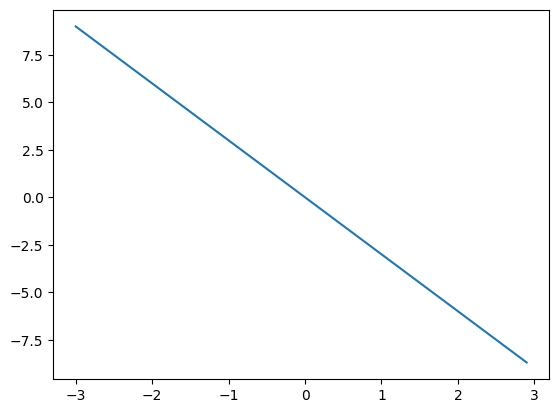

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import torch
w = torch.tensor(-10.0, requires_grad=True)

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

import matplotlib.pyplot as plt

plt.figure()          # <-- evita conflictos con figuras previas
plt.plot(X.numpy(), f.numpy())
plt.show()

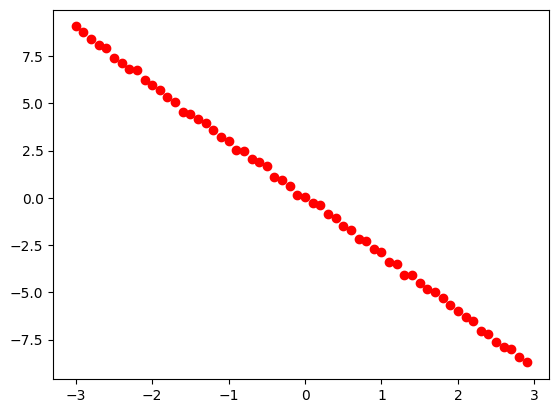

In [4]:
Y = f+0.1*torch.randn(X.size())  # data with noise
plt.plot(X.numpy(),Y.numpy(),'ro')
plt.show() 

We define the forward function, this is the equation of a line.

In [6]:
def forward(x):
    return w*x

$$ \hat y = w x

**Derivada de la función `forward`**

La predicción:

$$\hat{y} = w x$$

**Derivadas parciales**

- **Respecto a** `w`:

$$\frac{\partial \hat{y}}{\partial w} = x$$

- **Respecto a** `x`:

$$\frac{\partial \hat{y}}{\partial x} = w$$

**Gradiente del MSE**

Para MSE: $L = \frac{1}{N}\sum_{n=1}^N (y_n - \hat{y}_n)^2$

$$\frac{\partial L}{\partial w} = \frac{2}{N}\sum_{n=1}^N (\hat{y}_n - y_n) \, x_n = -\frac{2}{N}\sum_{n=1}^N (y_n - w x_n) \, x_n$$

In [7]:
def criterion(yhat,y): # Cost Function
    return torch.mean((yhat-y)**2)

lr = 0.1 #Learning rate
COST=[]
for epoch in range(4):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    loss.backward() # compute or accumulate gradients 
    w.data = w.data - lr*w.grad.data # update weights
    w.grad.data.zero_()  # zero the gradients after updating
    COST.append(loss.item())


As the models get more complicated, it gets more difficult to plot the COST or average loss for ach parameter, one alternative is to look at the cost for every iteration. 

### Bias and Slope
